In [68]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq

In [69]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [70]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [71]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [72]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [73]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [74]:
# Define the target cks values
target_cks = ['CK_Lunar Eclipse', 'CK_Solar Eclipse']

# Step 1: Filter the DataFrame for rows with target_cks values
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Get all cks values associated with those images
all_cks_for_images = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Step 4: Filter the original DataFrame to include only those rows
filtered_df = all_cks_for_images

filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
43,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00210,CK_Solar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
44,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00210,CK_Populated Earth,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
45,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00803,CK_Lunar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
46,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00803,CK_Populated Earth,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
55,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00047,CK_Solar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1490,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
27880,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01286,CK_Centrality of Earth,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...,2278,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Content, Annotated",295,Venice,1601,nan
27881,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01286,CK_Lunar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...,2278,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Content, Annotated",295,Venice,1601,nan
27935,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02107,CK_Lunar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...,2278,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Venice,1601,nan
27955,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_00681,CK_Lunar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...,2278,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Venice,1601,nan


In [75]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 1032


In [76]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Centrality of Earth                                 31
CK_Conical Shape of Planetary Shadow                   15
CK_Lunar Eclipse                                      704
CK_Lunar Nodes                                          5
CK_Populated Earth                                     43
CK_Relation Between the Spheres of Water and Earth     11
CK_Solar Eclipse                                      389
CK_Sphericity of the Earth                             91
CK_T-O Maps                                            11
CK_Terraqueous Globe                                  217
CK_Visibility of Stars from Varied Locations           21
CK_Zodiac                                               1
Name: images, dtype: int64


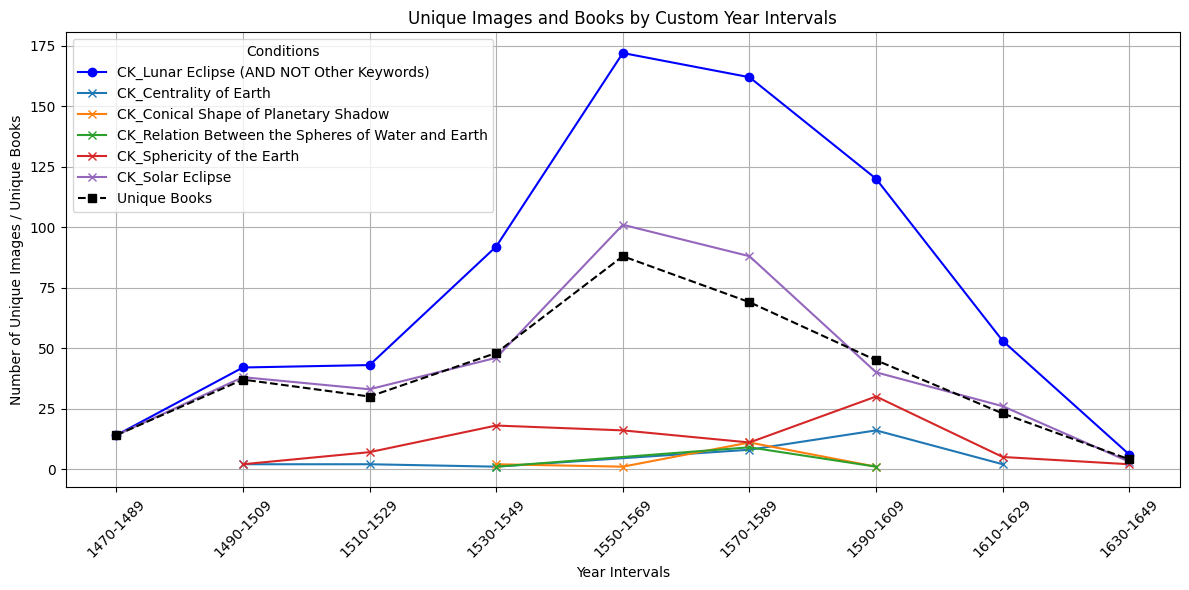

In [85]:
# Ensure the year columns are of integer type (use .loc to avoid SettingWithCopyWarning)
filtered_df.loc[:, 'year'] = filtered_df['year'].astype(int)
books.loc[:, 'year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins (use .loc to avoid SettingWithCopyWarning)
filtered_df.loc[:, 'interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame (use .loc to avoid SettingWithCopyWarning)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define the keywords
keywords_condition_1 = ['CK_Lunar Eclipse']
keywords_condition_2 = [
    'CK_Centrality of Earth', 
    'CK_Conical Shape of Planetary Shadow', 
    'CK_Relation Between the Spheres of Water and Earth', 
    'CK_Sphericity of the Earth',
    'CK_Solar Eclipse'
]

# Step 1: Filter the data for each condition

# Condition 1: CK_Lunar Eclipse and NOT the other specified keywords
condition_1 = (filtered_df['cks'].apply(lambda x: 'CK_Lunar Eclipse' in x) & 
               ~filtered_df['cks'].apply(lambda x: any(keyword in x for keyword in keywords_condition_2)))

# Step 2: Apply the conditions to count unique images
# For condition 1, count unique images with CK_Lunar Eclipse and NOT other keywords
unique_images_condition_1 = filtered_df[condition_1].groupby('interval', observed=True)['images'].nunique()

# Step 3: Count unique books per year interval (use observed=True to avoid FutureWarning)
unique_books_count = books.groupby('interval', observed=True)['book'].nunique()

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Plot the first condition (CK_Lunar Eclipse and NOT other keywords)
plt.plot(unique_images_condition_1.index.astype(str), unique_images_condition_1.values, label='CK_Lunar Eclipse (AND NOT Other Keywords)', marker='o', color='blue')

# Plot each keyword separately from the second condition
for keyword in keywords_condition_2:
    condition_2 = filtered_df['cks'].apply(lambda x: keyword in x)
    unique_images_condition_2 = filtered_df[condition_2].groupby('interval', observed=True)['images'].nunique()
    plt.plot(unique_images_condition_2.index.astype(str), unique_images_condition_2.values, label=keyword, marker='x')

# Plot the number of unique books as a line (dashed for clarity)
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='s', color='black', linestyle='--')

# Customize the plot
plt.title('Unique Images and Books by Custom Year Intervals')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Conditions')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
#output cluster names from filtered_df and create an excel file for visual tagging

# Get unique cluster_name values
#unique_cluster_names = filtered_df['cluster_name'].unique()

# Create a DataFrame from the unique values
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['cluster_name'])

# Define the output Excel file name
#output_file = 'eclipses.xlsx'

# Write the DataFrame to an Excel file
#unique_cluster_names_df.to_excel(output_file, index=False)

In [34]:
#output cluster names from filtered_df and create an excel file for visual tagging

# Get unique cluster_name values
#unique_cluster_names = final_df['cluster_name'].unique()

# Create a DataFrame from the unique values
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['cluster_name'])

# Define the output Excel file name
#output_file = 'eclipses_and_related_keywords.xlsx'

# Write the DataFrame to an Excel file
#unique_cluster_names_df.to_excel(output_file, index=False)

In [88]:
#combine with visual data

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\eclipses_and_related_keywords.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

eclipses_and_related_keywords = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

In [89]:
# Count unique values in the specified column
unique_count = eclipses_and_related_keywords['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

# Count unique images associated with each cks value
unique_images_per_cks = eclipses_and_related_keywords.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique values in 'images': 1032
Number of unique images associated with each cks value:
cks
CK_Centrality of Earth                                 31
CK_Conical Shape of Planetary Shadow                   15
CK_Lunar Eclipse                                      704
CK_Lunar Nodes                                          5
CK_Populated Earth                                     43
CK_Relation Between the Spheres of Water and Earth     11
CK_Solar Eclipse                                      389
CK_Sphericity of the Earth                             91
CK_T-O Maps                                            11
CK_Terraqueous Globe                                  217
CK_Visibility of Stars from Varied Locations           21
CK_Zodiac                                               1
Name: images, dtype: int64


In [90]:
#visual graphs

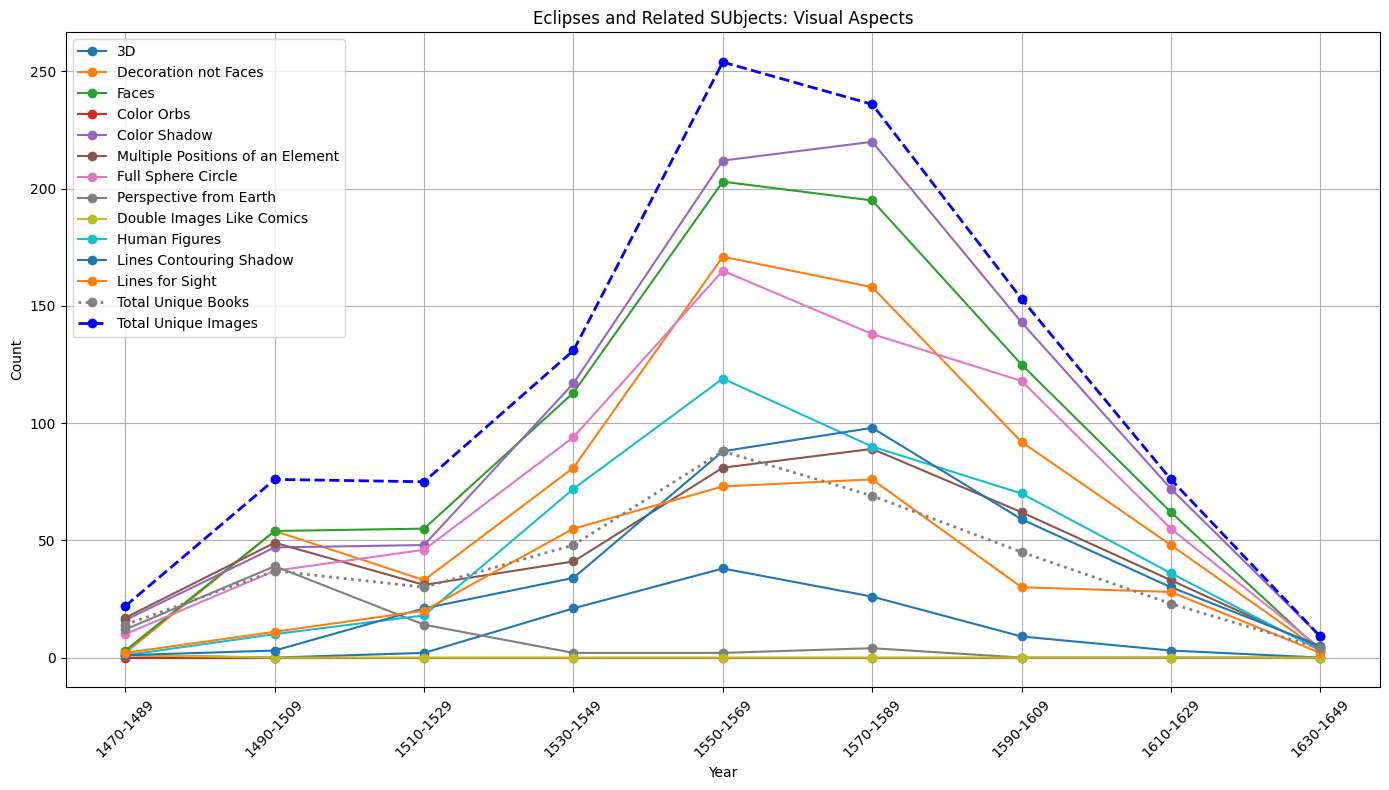

In [91]:
# Convert 'year' to int
eclipses_and_related_keywords['year'] = eclipses_and_related_keywords['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eclipses_and_related_keywords['interval'] = pd.cut(eclipses_and_related_keywords['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = eclipses_and_related_keywords[eclipses_and_related_keywords[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names and 'yes' filter
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration_not_faces = count_unique_images_by_column('decoration not faces', 'yes')
faces = count_unique_images_by_column('faces', 'yes')
color_orbs = count_unique_images_by_column('color orbs', 'yes')
color_shadow = count_unique_images_by_column('color shadow', 'yes')
multiple_positions_of_an_element = count_unique_images_by_column('multiple positions of an element', 'yes')
full_sphere_circle = count_unique_images_by_column('full sphere circle', 'yes')
perspective_from_earth = count_unique_images_by_column('perspective from earth', 'yes')
double_images_like_comics = count_unique_images_by_column('double images like comics', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_conturing_shadow = count_unique_images_by_column('lines conturing shadow', 'yes')
lines_for_sight = count_unique_images_by_column('lines for sight', 'yes')
#double_image_two_perspectives = count_unique_images_by_column('double image two perspectives', 'yes')

# Combine the data for plotting
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Decoration not Faces': decoration_not_faces,
    'Faces': faces,
    'Color Orbs': color_orbs,
    'Color Shadow': color_shadow,
    'Multiple Positions of an Element': multiple_positions_of_an_element,
    'Full Sphere Circle': full_sphere_circle,
    'Perspective from Earth': perspective_from_earth,
    'Double Images Like Comics': double_images_like_comics,
    'Human Figures': human_figures,
    'Lines Contouring Shadow': lines_conturing_shadow,
    'Lines for Sight': lines_for_sight,
#    'Double Image Two Perspectives': double_image_two_perspectives
})


# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = eclipses_and_related_keywords.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Eclipses and Related SUbjects: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


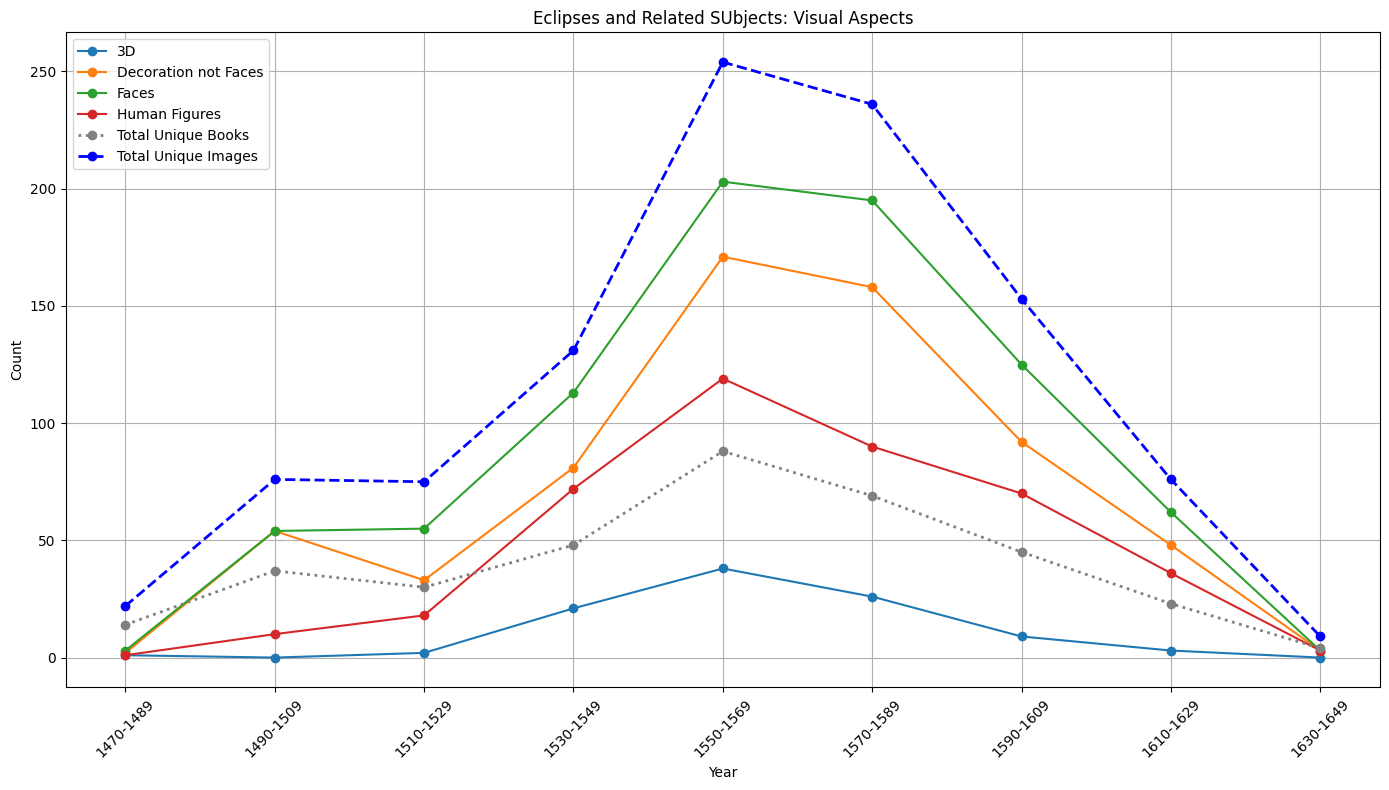

In [92]:
# Convert 'year' to int
eclipses_and_related_keywords['year'] = eclipses_and_related_keywords['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eclipses_and_related_keywords['interval'] = pd.cut(eclipses_and_related_keywords['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = eclipses_and_related_keywords[eclipses_and_related_keywords[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names and 'yes' filter
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration_not_faces = count_unique_images_by_column('decoration not faces', 'yes')
faces = count_unique_images_by_column('faces', 'yes')
color_orbs = count_unique_images_by_column('color orbs', 'yes')
color_shadow = count_unique_images_by_column('color shadow', 'yes')
multiple_positions_of_an_element = count_unique_images_by_column('multiple positions of an element', 'yes')
full_sphere_circle = count_unique_images_by_column('full sphere circle', 'yes')
perspective_from_earth = count_unique_images_by_column('perspective from earth', 'yes')
double_images_like_comics = count_unique_images_by_column('double images like comics', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_conturing_shadow = count_unique_images_by_column('lines conturing shadow', 'yes')
lines_for_sight = count_unique_images_by_column('lines for sight', 'yes')
#double_image_two_perspectives = count_unique_images_by_column('double image two perspectives', 'yes')

# Combine the data for plotting
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Decoration not Faces': decoration_not_faces,
    'Faces': faces,
#    'Color Orbs': color_orbs,
#    'Color Shadow': color_shadow,
#    'Multiple Positions of an Element': multiple_positions_of_an_element,
#    'Full Sphere Circle': full_sphere_circle,
#    'Perspective from Earth': perspective_from_earth,
#    'Double Images Like Comics': double_images_like_comics,
    'Human Figures': human_figures,
#    'Lines Contouring Shadow': lines_conturing_shadow,
#    'Lines for Sight': lines_for_sight,
#    'Double Image Two Perspectives': double_image_two_perspectives
})


# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = eclipses_and_related_keywords.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Eclipses and Related SUbjects: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


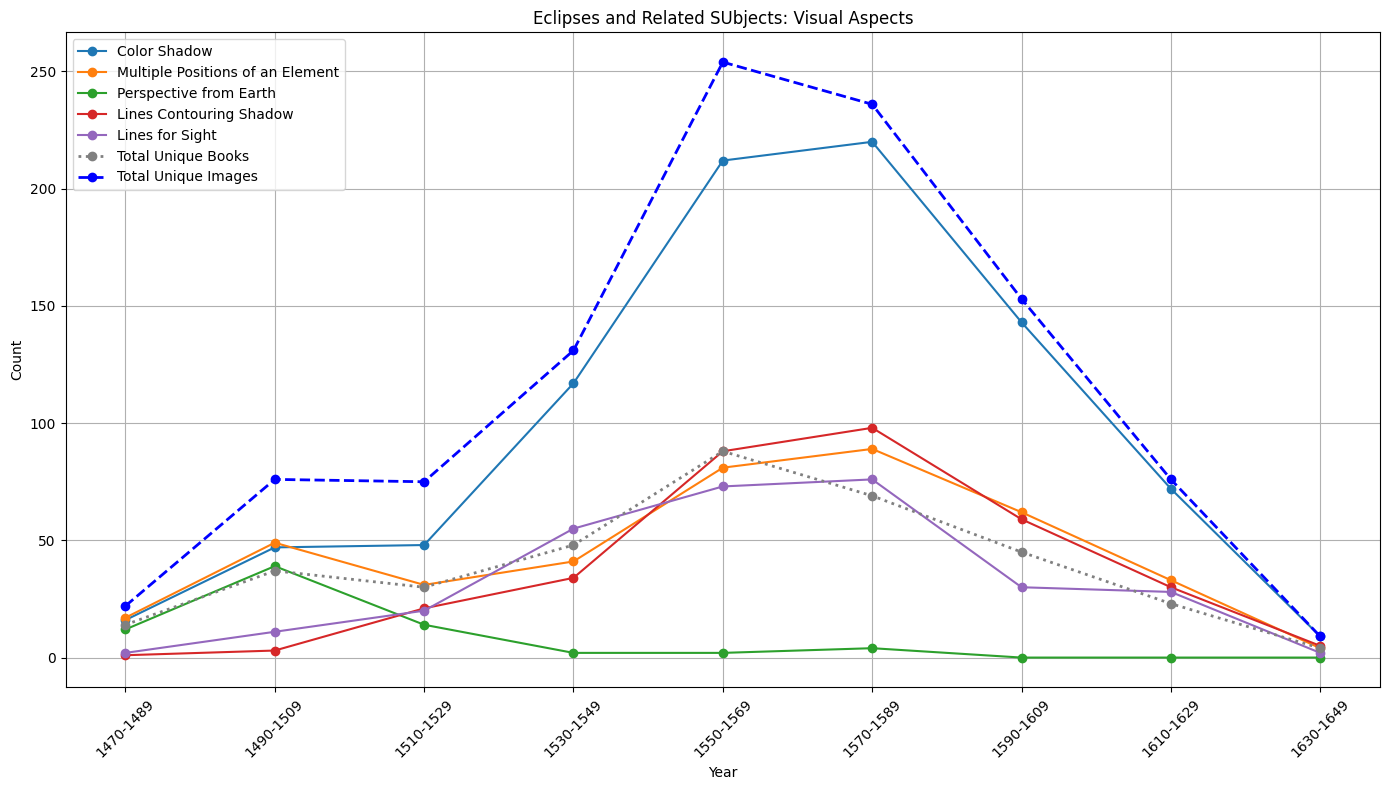

In [94]:
# Convert 'year' to int
eclipses_and_related_keywords['year'] = eclipses_and_related_keywords['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eclipses_and_related_keywords['interval'] = pd.cut(eclipses_and_related_keywords['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = eclipses_and_related_keywords[eclipses_and_related_keywords[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names and 'yes' filter
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration_not_faces = count_unique_images_by_column('decoration not faces', 'yes')
faces = count_unique_images_by_column('faces', 'yes')
color_orbs = count_unique_images_by_column('color orbs', 'yes')
color_shadow = count_unique_images_by_column('color shadow', 'yes')
multiple_positions_of_an_element = count_unique_images_by_column('multiple positions of an element', 'yes')
full_sphere_circle = count_unique_images_by_column('full sphere circle', 'yes')
perspective_from_earth = count_unique_images_by_column('perspective from earth', 'yes')
double_images_like_comics = count_unique_images_by_column('double images like comics', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_conturing_shadow = count_unique_images_by_column('lines conturing shadow', 'yes')
lines_for_sight = count_unique_images_by_column('lines for sight', 'yes')
#double_image_two_perspectives = count_unique_images_by_column('double image two perspectives', 'yes')

# Combine the data for plotting
side_by_side_data = pd.DataFrame({
#    '3D': three_dimensions_effect,
#    'Decoration not Faces': decoration_not_faces,
#    'Faces': faces,
#    'Color Orbs': color_orbs,
    'Color Shadow': color_shadow,
    'Multiple Positions of an Element': multiple_positions_of_an_element,
#    'Full Sphere Circle': full_sphere_circle,
    'Perspective from Earth': perspective_from_earth,
#    'Double Images Like Comics': double_images_like_comics,
#    'Human Figures': human_figures,
    'Lines Contouring Shadow': lines_conturing_shadow,
    'Lines for Sight': lines_for_sight,
#    'Double Image Two Perspectives': double_image_two_perspectives
})


# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = eclipses_and_related_keywords.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Eclipses and Related SUbjects: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
